In [3]:
################ Dorsa Frazaneh Ghasri - KNN ########################

import numpy as np
import pandas as pd
import matplotlib as plt

# I added this part, because I got an error in these parts: df['Minor_Axis_Length'] = pd.to_numeric(df['Minor_Axis_Length'], errors='coerce')
#Then I understood I didn't need it!!!
pd.options.mode.chained_assignment = None  # default='warn'


In [4]:
########### importing the data frame ##############

df = pd.read_csv(r'C:\Users\ASUS\Desktop\21.12\21.12.csv')

In [5]:
######## finding type of each column:
df.dtypes

Area                  object
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length     object
Eccentricity         float64
Convex_Area           object
Extent               float64
Class                 object
dtype: object

In [6]:
########### printing first ten rows
df.head(10)

Area   Perimeter  Major_Axis_Length Minor_Axis_Length  Eccentricity  \
0  7551  369.063995         163.408829       59.53240585      0.931275   
1  8546  388.580994         172.519959       63.34475327      0.930152   
2  7833  373.157013         162.516434       63.56500244      0.920336   
3  9292  414.118988         183.639710       64.87107086      0.935528   
4  7943  362.673004         154.886322       65.93088531      0.904877   
5  9414  407.825012         179.545883       66.91815948      0.927949   
6  9908  432.769012         188.187683       67.69534302      0.933059   
7  8709  383.527008         164.193893       67.93288422      0.910397   
8  9426  402.709992         175.974289       68.60753632      0.920869   
9  9273  406.402008         173.414093       68.80253601      0.917925   

  Convex_Area    Extent     Class  
0        7723  0.756462  Osmancik  
1        8685  0.735456  Osmancik  
2        8015  0.769752  Osmancik  
3        9442  0.501078  Osmancik  
4        8080  0.608659  Osmancik  
5        9583  0.810434  Osmancik  
6       10205  0.611680    Cammeo  
7        8873  0.767989  Osmancik  
8        9578  0.577432  Osmancik  
9        9445  0.530098  Osmancik

In [7]:
############ printing last ten rows
df.tail(10)

Area   Perimeter  Major_Axis_Length Minor_Axis_Length  Eccentricity  \
3817   9751  412.597992         175.450638       71.44275665      0.913341   
3818   9802  412.368988         176.165573       71.48280334      0.913975   
3819   8501  371.024994         153.896255       71.51190948      0.885481   
3820   8850  381.433990         159.251205       71.76094818      0.892718   
3821  10713  443.403992         192.886185       71.78689575      0.928164   
3822  10151  420.899994         181.995575       72.09951019      0.918181   
3823  10222  423.497009         182.800247        72.1242981      0.918873   
3824   9216  384.342011         163.291626       72.26079559      0.896756   
3825  11377  452.407989         201.306259       72.28141785      0.933314   
3826   9598  397.000000         172.006790       72.28364563      0.907414   

     Convex_Area    Extent     Class  
3817       10034  0.714359  Osmancik  
3818        9991  0.566950  Osmancik  
3819        8738  0.639846  Osmancik  
3820        9063  0.572519  Osmancik  
3821       10969  0.696101  Osmancik  
3822       10407  0.521634  Osmancik  
3823       10421  0.820385  Osmancik  
3824        9352  0.624771  Osmancik  
3825       11555  0.525545    Cammeo  
3826        9766  0.796845  Osmancik

In [8]:
############ printing the number of columns and rows
# Get the number of rows and columns
num_rows, num_columns = df.shape
# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3827
Number of columns: 8


In [9]:
############ NULL VALUES ######################

In [10]:
#shows the null values
df.isna().sum()

Area                 1
Perimeter            0
Major_Axis_Length    3
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          2
Extent               1
Class                0
dtype: int64

In [11]:
#dropping the null valuesdf = df.dropna(subset=["id"])
# اینجا میبینیم که 7 تا ردیف کم شده
df_new = df.dropna()

In [12]:
df_new.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [13]:
############  ??? #################

In [14]:
# Replace "???" with NaN
df_new.replace('???', pd.NA, inplace=True)

In [15]:
# Drop rows with NaN values
df_new.dropna(inplace=True)

In [16]:
# Save the cleaned DataFrame back to a CSV file
df_new.to_csv('cleaned_rice.csv', index=False)

In [17]:
# Check if a specific value is present in the DataFrame
special_value = "???" 
is_present = df_new.isin([special_value]).any().any()

if is_present: 
    print(f"The special value '{special_value}' is present in the DataFrame.")
else: 
    print(f"The special value '{special_value}' is not present in the DataFrame.")

The special value '???' is not present in the DataFrame.


In [18]:
########### DUPLICATES #################

In [19]:
# checking the duplicated values
df_new.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3822     True
3823     True
3824     True
3825     True
3826    False
Length: 3816, dtype: bool

In [20]:
#dropping the duplicated values
df_duplicate = df_new.drop_duplicates()

In [21]:
#checking if the duplicated values are deleted or not.
df_duplicate.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3812    False
3813    False
3814    False
3815    False
3826    False
Length: 3800, dtype: bool

In [22]:
# changing dataframe's name
df = df_duplicate

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3812    False
3813    False
3814    False
3815    False
3826    False
Length: 3800, dtype: bool

In [24]:
############### MIN and MAX ###############

In [25]:
print(df['Area'].min())
print(df['Area'].max())

print(df['Perimeter'].min())
print(df['Perimeter'].max())

print(df['Major_Axis_Length'].min())
print(df['Major_Axis_Length'].max())

print(df['Minor_Axis_Length'].min())
print(df['Minor_Axis_Length'].max())

print(df['Eccentricity'].min())
print(df['Eccentricity'].max())

print(df['Convex_Area'].min())
print(df['Convex_Area'].max())

print(df['Extent'].min())
print(df['Extent'].max())

print(df['Class'].min())
print(df['Class'].max())

10000
9994
359.1000061
548.4459839
145.2644653
239.010498
100.1218948
99.99777985
0.777232587
0.948006928
10003
9999
0.49741286
0.861049533
Cammeo
Osmancik


In [26]:
############# MEAN & STD ############# 

In [27]:
# finding mean(average)
# first we check the data types. We can find the avg if they have a float type.
df.dtypes

Area                  object
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length     object
Eccentricity         float64
Convex_Area           object
Extent               float64
Class                 object
dtype: object

In [28]:
df.shape

(3800, 8)

In [29]:
############# NORMALIZING  ######################
#df = (df-df.mean())/df.std()
# با تبدیل داده ها به حالت numeric به مشکل خوردم تو قسمت کلاس

In [30]:
# FIRST WE NEED TO CHANGE THE TYPE OF OBJECTS TO FLOAT
df['Area'] = df['Area'].astype(float)
df['Minor_Axis_Length'] = df['Minor_Axis_Length'].astype(float)
df['Convex_Area'] = df['Convex_Area'].astype(float)

In [31]:
# before normalizing the data, we store the mean and std, to use them for new values.

df_mean = df.iloc[:,:7].mean()
df_std = df.iloc[:,:7].std()

In [32]:
df_mean

Area                 12672.520789
Perimeter              454.333554
Major_Axis_Length      188.818005
Minor_Axis_Length       86.328101
Eccentricity             0.886885
Convex_Area          12957.439474
Extent                   0.661945
dtype: float64

In [33]:
df_std

Area                 1731.227144
Perimeter              35.582385
Major_Axis_Length      17.445782
Minor_Axis_Length       5.720103
Eccentricity            0.020797
Convex_Area          1775.793357
Extent                  0.077269
dtype: float64

In [34]:
# we didn't want to select the last column
df.iloc[:,:7] = (df.iloc[:,:7] - df.iloc[:,:7].mean())/ df.iloc[:,:7].std()

In [35]:
df

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0    -2.958318  -2.396398          -1.456465          -4.684478      2.134477   
1    -2.383581  -1.847896          -0.934211          -4.017995      2.080478   
2    -2.795428  -2.281369          -1.507618          -3.979491      1.608443   
3    -1.952673  -1.130182          -0.296822          -3.751161      2.338968   
4    -2.731889  -2.576009          -1.944979          -3.565882      0.865141   
...        ...        ...                ...                ...           ...   
3812  3.258082   2.365340           1.928618           3.471379     -0.391920   
3813  2.733020   1.897890           1.275094           3.498140     -1.109605   
3814  3.604657   2.456621           2.196375           3.604875     -0.224813   
3815  3.047248   2.039899           1.448821           3.708735     -1.067463   
3826 -1.775920  -1.611290          -0.963626          -2.455280      0.987136   

      Convex_Area    Extent     Class  
0       -2.947662  1.223219  Osmancik  
1       -2.405933  0.951369  Osmancik  
2       -2.783229  1.395226  Osmancik  
3       -1.979644 -2.081906  Osmancik  
4       -2.746626 -0.689617  Osmancik  
...           ...       ...       ...  
3812     3.247315 -0.485637    Cammeo  
3813     2.692633  0.293946    Cammeo  
3814     3.458488  1.840060    Cammeo  
3815     3.020937  0.057264    Cammeo  
3826    -1.797191  1.745856  Osmancik  

[3800 rows x 8 columns]

In [36]:
# if you don't change the type to int, you will get some other numbers that are close to zero.
df.iloc[:,:7].mean().astype('int64')

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

In [37]:
df.iloc[:,:7].std()

Area                 1.0
Perimeter            1.0
Major_Axis_Length    1.0
Minor_Axis_Length    1.0
Eccentricity         1.0
Convex_Area          1.0
Extent               1.0
dtype: float64

In [38]:
############ NEW DATA  ###########

In [39]:
# at first we create an empty dictionary to insert the new values there
rice_dic = {} 
# we write the name of each column as we don't want the last column to be inserted
columns = ["Area", "Perimeter", "Major_Axis_Length", "Minor_Axis_Length", "Eccentricity", "Convex_Area", "Extent"]


In [40]:
# Then we select each of the columns and assign a value to them
for col in columns:
    value = float(input(f'Please enter a value for {col}: '))
    rice_dic[col] = value
print(rice_dic)


Please enter a value for Area: 9908
Please enter a value for Perimeter: 432.7690125
Please enter a value for Major_Axis_Length: 188.1876831
Please enter a value for Minor_Axis_Length: 67.69534302
Please enter a value for Eccentricity: 0.933059335
Please enter a value for Convex_Area: 10205
Please enter a value for Extent: 0.611680448
{'Area': 9908.0, 'Perimeter': 432.7690125, 'Major_Axis_Length': 188.1876831, 'Minor_Axis_Length': 67.69534302, 'Eccentricity': 0.933059335, 'Convex_Area': 10205.0, 'Extent': 0.611680448}


In [41]:
# first we build a dataframe
df_input = pd.DataFrame(rice_dic, index=[0])
df_input

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  9908.0  432.769012         188.187683          67.695343      0.933059   

   Convex_Area   Extent  
0      10205.0  0.61168

In [42]:
##############  Normalize the DataFrame  ############# 
normalized_df = (df_input - df_mean) / df_std

In [43]:
normalized_df

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0 -1.596856  -0.606045           -0.03613          -3.257416      2.220251   

   Convex_Area    Extent  
0    -1.549977 -0.650514

In [44]:
# Note!!!

#this is wrong, because it is using the normalized data we had:
    #rice_dic[col] = (rice_dic[col] - df.iloc[:,:7].mean()) / df.iloc[:,:7].std()

In [45]:
# Concatenate the new data with the existing DataFrame
new_df = pd.concat([df, df_input], ignore_index=True)

In [46]:
# in two upcoming cells I have shown the number of rows changing.
new_df.shape

(3801, 8)

In [47]:
df.shape

(3800, 8)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 0 to 3826
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3800 non-null   float64
 1   Perimeter          3800 non-null   float64
 2   Major_Axis_Length  3800 non-null   float64
 3   Minor_Axis_Length  3800 non-null   float64
 4   Eccentricity       3800 non-null   float64
 5   Convex_Area        3800 non-null   float64
 6   Extent             3800 non-null   float64
 7   Class              3800 non-null   object 
dtypes: float64(7), object(1)
memory usage: 267.2+ KB


In [49]:
########### KNN ##################

In [51]:
def euclidean_distance(point1, point2):
    distance = np.sqrt(np.sum(np.square(point1 - point2)))
    return distance

In [56]:
def knn_classification(train_df, test_point, train_labels, k):
    distances = []
    
    # Calculate distances between test_point and each training data point
    for i in range(train_df.shape[0]):
        distance = euclidean_distance(test_point, train_df.iloc[i].values)
        distances.append((distance, train_labels.iloc[i]))
    
    # Sort distances in ascending order
    distances.sort(key=lambda x: (x[0], x[1]))
    
    # Select k nearest neighbors
    neighbors = distances[:k]
    
    class_counts = {}
    for neighbor in neighbors:
        label = neighbor[1]
        class_counts[label] = class_counts.get(label, 0) + 1
    
    # Predict the majority class label
    predicted_class = max(class_counts, key=class_counts.get)
    return predicted_class, distances

# مثال استفاده
X_train = df.iloc[:, :7]
y_train = df['Class']
X_test = normalized_df.values[0]

k = 3 # تعداد همسایه‌ها

# اجرای تابع knn_classification
predicted_class, distances = knn_classification(X_train, X_test, y_train, k)
print('Predicted Class:', predicted_class)

Predicted Class: Osmancik


In [57]:
print('Distances:', distances)

Distances: [(0.0, 'Cammeo'), (0.8132757788264374, 'Osmancik'), (0.8269413006938491, 'Osmancik'), (1.1400328244129019, 'Osmancik'), (1.332555555167228, 'Osmancik'), (1.4040697968851443, 'Osmancik'), (1.4290917473638796, 'Osmancik'), (1.478703513200373, 'Osmancik'), (1.5133462808523495, 'Osmancik'), (1.5244430604285357, 'Osmancik'), (1.524883631262639, 'Osmancik'), (1.5515422134663106, 'Osmancik'), (1.5534992613817826, 'Osmancik'), (1.5612366224448464, 'Osmancik'), (1.5920973733661097, 'Osmancik'), (1.6530512099619483, 'Osmancik'), (1.6791649085399027, 'Osmancik'), (1.7206566576760007, 'Osmancik'), (1.7470888078564581, 'Osmancik'), (1.7497813201082117, 'Osmancik'), (1.8071256975733168, 'Osmancik'), (1.826121802311754, 'Cammeo'), (1.8424577027043352, 'Cammeo'), (1.8613031789247845, 'Cammeo'), (1.891092669170553, 'Osmancik'), (1.9016816277864168, 'Cammeo'), (1.913115083601661, 'Osmancik'), (1.9311701753841075, 'Osmancik'), (1.946082976018661, 'Osmancik'), (1.952210022312038, 'Osmancik'), (

In [ ]:
############## The End (The other parts are used for more accuracy) #####################

In [55]:
"""
import numpy as np
from collections import Counter
def find_most_suitable_class(train_data, train_labels, test_point, k):
    distances = []
    
    # Calculate distances between test_point and each training data point
    for i in range(train_data.shape[0]):
        distance = euclidean_distance(test_point, train_data[i])
        distances.append((distance, train_labels[i]))
    
    # Sort distances in ascending order
    distances.sort(key=lambda x: x[0])
    
    # Select k nearest neighbors
    neighbors = distances[:k]
    
    # Count the occurrences of each class label among the neighbors
    class_counts = Counter([neighbor[1] for neighbor in neighbors])
    
    # Find the class label with the highest count
    most_suitable_class = class_counts.most_common(1)[0][0]
    
    return most_suitable_class

#############
X_train = df.iloc[:, :7].values
y_train = df['Class'].values
X_test = normalized_df.values[0]

k = 1  # Number of neighbors

# Find the most suitable class for the test point
predicted_class = find_most_suitable_class(X_train, y_train, X_test, k)

print("Predicted class:", predicted_class)
"""

Predicted class: Osmancik


In [54]:
# These parts are for myself.

In [56]:
# Convert the 'Class' column to numeric values
#df['Class'] = df['Class'].replace('Osmancik', 1).replace('Cammeo', 0)

In [59]:
"""
import numpy as np
from collections import Counter

def find_best_k(train_data, train_labels, test_data, test_labels):
    best_k = None
    best_accuracy = 0.0
    
    for k in range(1, len(train_data) + 1):
        accuracies = []
        
        for i in range(len(test_data)):
            predicted_class = find_most_suitable_class(train_data, train_labels, test_data[i], k)
            accuracies.append(predicted_class == test_labels[i])
        
        accuracy = np.mean(accuracies)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    
    return best_k, best_accuracy

# Example usage
X_train = df.iloc[:, :7].values
y_train = df['Class'].values
X_test = normalized_df.values
y_test = df['Class'].replace('Osmancik', 1).replace('Cammeo', 0).values

best_k, best_accuracy = find_best_k(X_train, y_train, X_test, y_test)

print("Best k:", best_k)
print("Best accuracy:", best_accuracy)
"""

'\nimport numpy as np\nfrom collections import Counter\n\ndef find_best_k(train_data, train_labels, test_data, test_labels):\n    best_k = None\n    best_accuracy = 0.0\n    \n    for k in range(1, len(train_data) + 1):\n        accuracies = []\n        \n        for i in range(len(test_data)):\n            predicted_class = find_most_suitable_class(train_data, train_labels, test_data[i], k)\n            accuracies.append(predicted_class == test_labels[i])\n        \n        accuracy = np.mean(accuracies)\n        \n        if accuracy > best_accuracy:\n            best_accuracy = accuracy\n            best_k = k\n    \n    return best_k, best_accuracy\n\n# Example usage\nX_train = df.iloc[:, :7].values\ny_train = df[\'Class\'].values\nX_test = normalized_df.values\ny_test = df[\'Class\'].replace(\'Osmancik\', 1).replace(\'Cammeo\', 0).values\n\nbest_k, best_accuracy = find_best_k(X_train, y_train, X_test, y_test)\n\nprint("Best k:", best_k)\nprint("Best accuracy:", best_accuracy)\n'

In [ ]:
####################################################################

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Osmancik', 'Osmancik', 'Osmancik', ..., 'Cammeo', 'Cammeo',
       'Osmancik'], dtype=object)

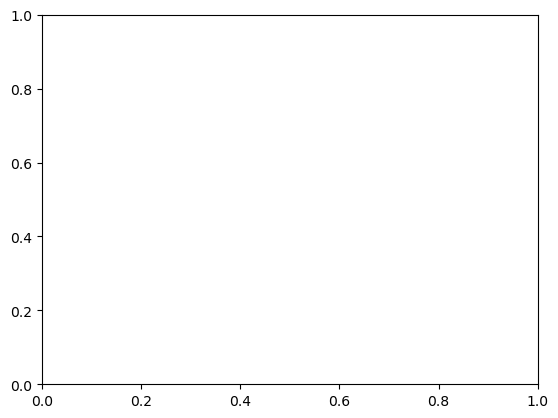

In [55]:
"""
import matplotlib.pyplot as plt

# Example data points
X_train = df.iloc[:, :2].values
y_train = df['Class'].values
X_test = normalized_df.values[0][:2]
new_data = [1, 2]

k = 3

# Calculate distances
distances = []
for i in range(X_train.shape[0]):
    distance = euclidean_distance(X_test, X_train[i])
    distances.append((distance, X_train[i], y_train[i]))
distances.sort(key=lambda x: x[0])

# Select k nearest data points
nearest_data_points = [point[1] for point in distances[:k]]
nearest_labels = [point[2] for point in distances[:k]]

# Plot the k nearest data points and the new data point
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test[0], X_test[1], color='red', marker='x', label='New Data')
plt.scatter([point[0] for point in nearest_data_points], [point[1] for point in nearest_data_points],
            c=nearest_labels, cmap='viridis', edgecolors='black', linewidths=1, label='Nearest Data Points')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K Nearest Data Points')
plt.legend()

# Display the plot
plt.show()
"""